In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kurtosis, skew
import numpy.linalg as la 
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import re

base=pd.read_csv('bank-additional-full.csv', sep=';')
base=

Because the .csv initially populated all in one column, I need to separate the columns at the semicolon to make sure each feature is distinct.

Pulling basic data information; head(),info(),describe(),check for missing and null values, dimensions

In [2]:
base.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
print('.csv dimensions:',base.shape[0],'rows,',base.shape[1],'columns.')

.csv dimensions: 41188 rows, 21 columns.


In [4]:
base.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
base.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
duplicates=base.duplicated()
rows=base[duplicates]
print(rows)

       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired    single    uni

Break the dataset up into continuous and categorical variables for univariate, bivariate and multivariate analysis.

In [8]:
numerical=base.select_dtypes(exclude='object')
categorical=base.select_dtypes(include='object')

Univariate Analysis

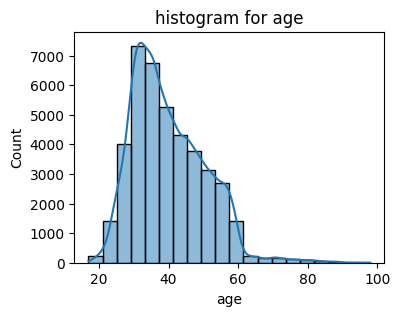

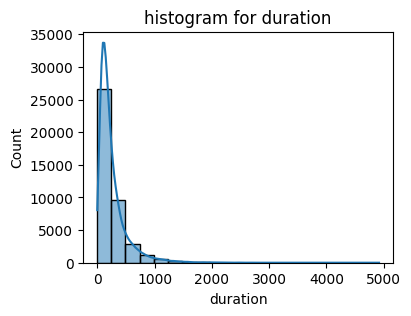

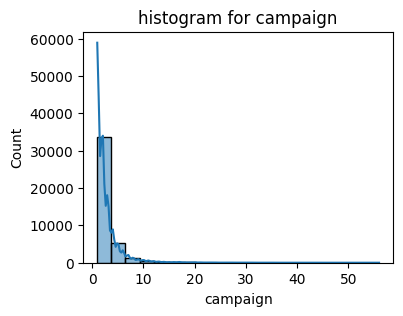

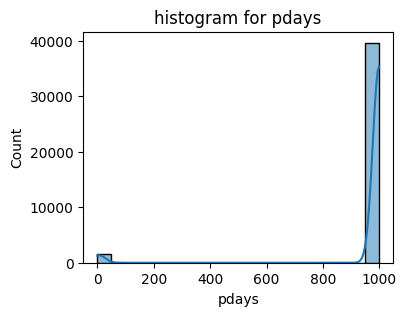

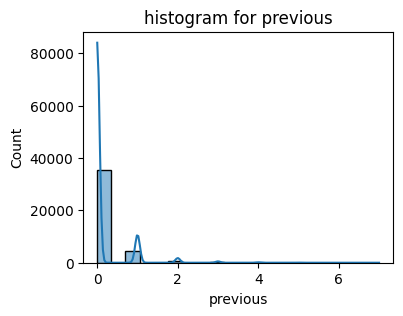

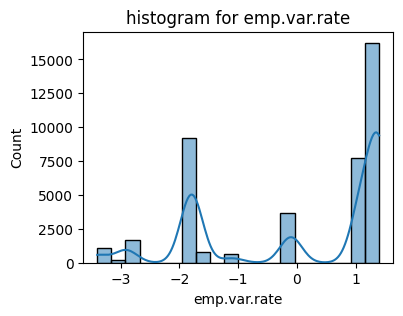

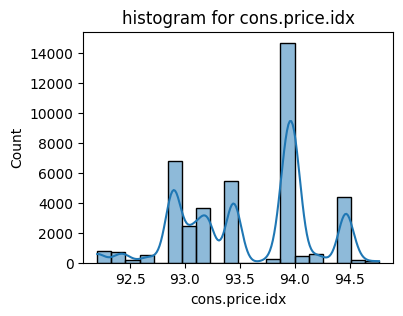

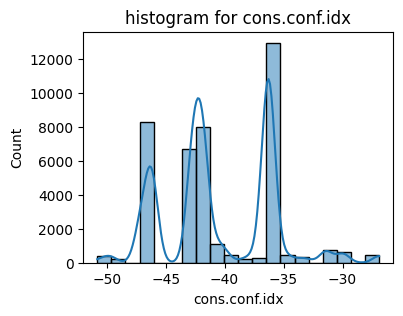

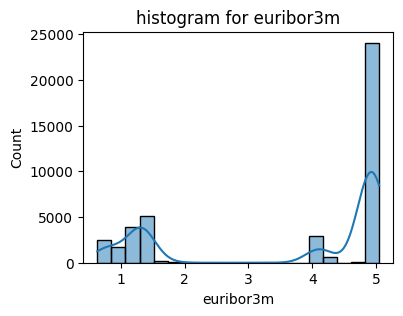

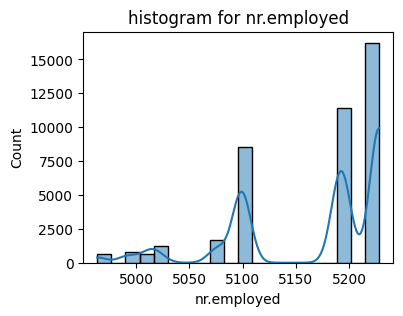

In [9]:
for col in numerical.columns:
    plt.figure(figsize=(4,3))
    sns.histplot(numerical[col],kde=True, bins=20)
    plt.title(f'histogram for {col}')
    plt.show()

We can see the skew in thw data via a simple preliminary observation.
Over- and Under-sampling techniques will likely be necessary to make sure that the data is effectively utilized.

Numerical Bivariate Analysis

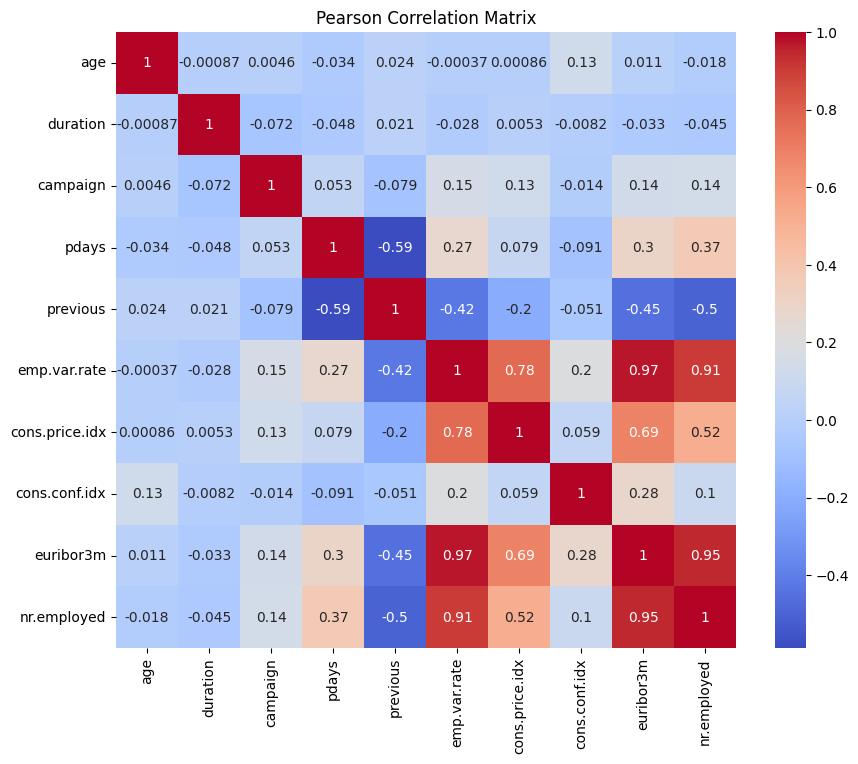

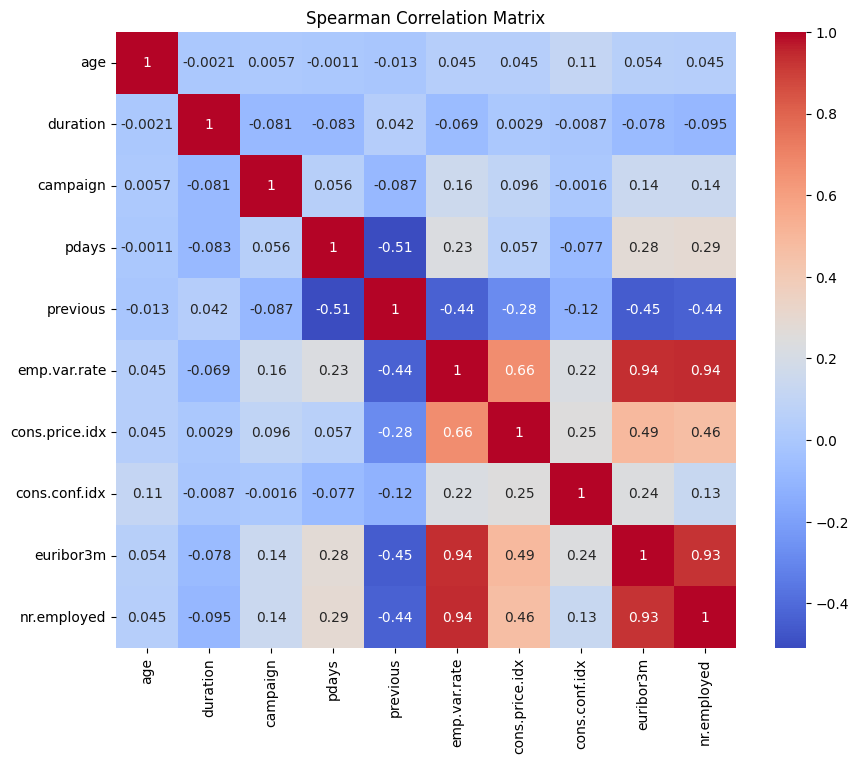

In [10]:
correlators=numerical
pearson=correlators.corr(method='pearson')
spearman=correlators.corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(pearson, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(spearman, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

Checking for Multicollinearity using both VIF and Condition Number Calculation

Using statsmodel to calculate VIF

         features           VIF
0             age     16.047296
1        duration      2.011044
2        campaign      1.921499
3           pdays     44.413175
4        previous      2.001464
5    emp.var.rate     28.910219
6  cons.price.idx  22561.123124
7   cons.conf.idx    120.086975
8       euribor3m    226.237349
9     nr.employed  26746.634212


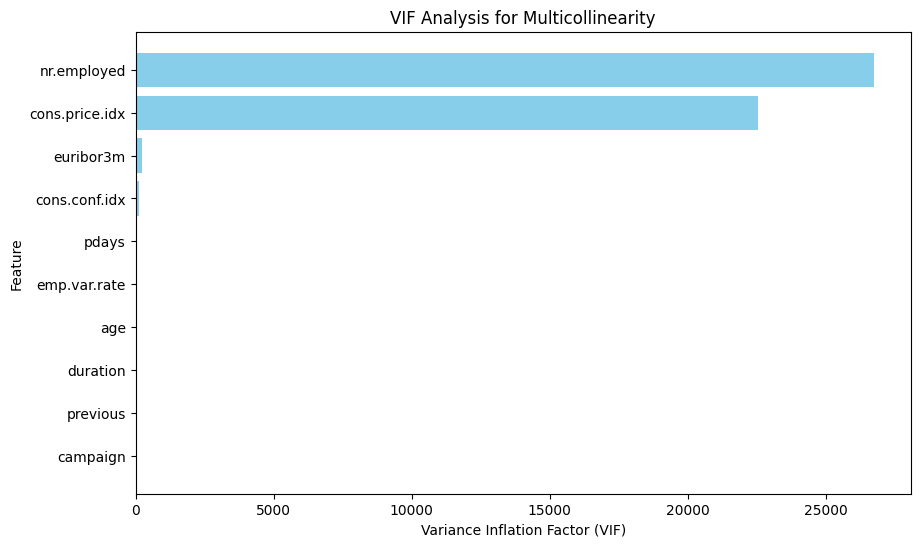

In [11]:

vif_data=pd.DataFrame()
vif_data['features']=numerical.columns
vif_data['VIF']=[variance_inflation_factor(numerical.values,i) for i in range(len(numerical.columns))]
print(vif_data)

vif_data = vif_data.sort_values(by="VIF", ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(vif_data["features"], vif_data["VIF"], color="skyblue")
plt.xlabel("Variance Inflation Factor (VIF)")
plt.ylabel("Feature")
plt.title("VIF Analysis for Multicollinearity")
plt.gca().invert_yaxis()  
plt.show()

Using numpy to calculate Condition Number,and then running the math from scratch.
A condition number is used to determine how susceptible a given output for a matrix is to differences or inconsistencies in the input data. There are many different types of condition numbers; we are going to determine the 2-norm, or the condition number for inversion, in this instance.

In [12]:
import numpy.linalg as LA

cond=np.linalg.cond(numerical)
print("Condition number for numerical columns:",cond)


Condition number for numerical columns: 26938.749352752082


That condition number is really high, which verifies what we see in the Variance Inflation Factor visualization. Let me use PCA to combine those features, and run the test again.

Univariate Analysis for Categorical Variables

<Figure size 400x500 with 0 Axes>

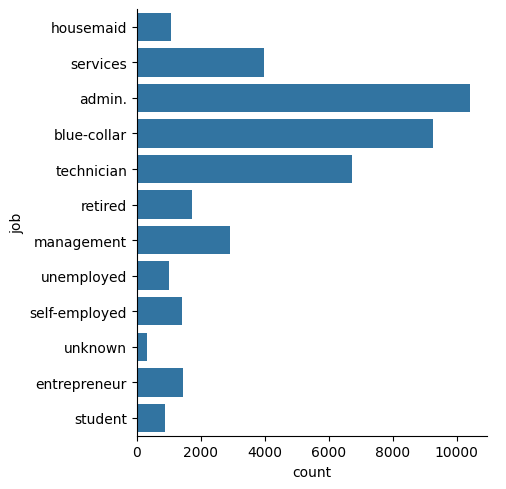

<Figure size 400x500 with 0 Axes>

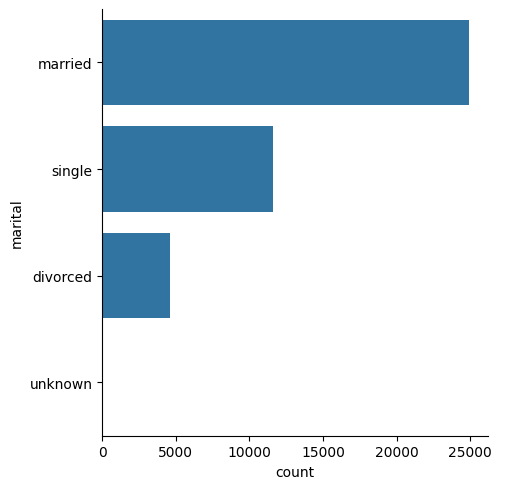

<Figure size 400x500 with 0 Axes>

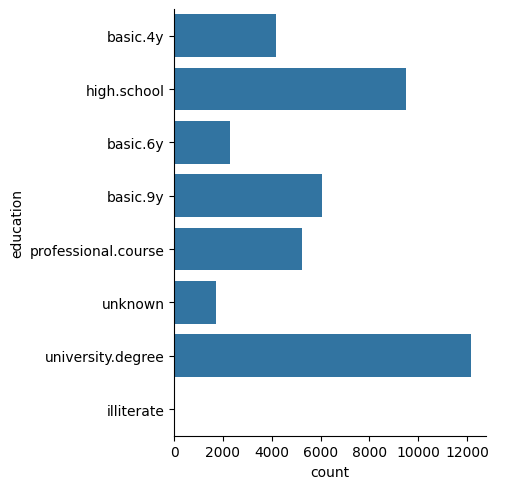

<Figure size 400x500 with 0 Axes>

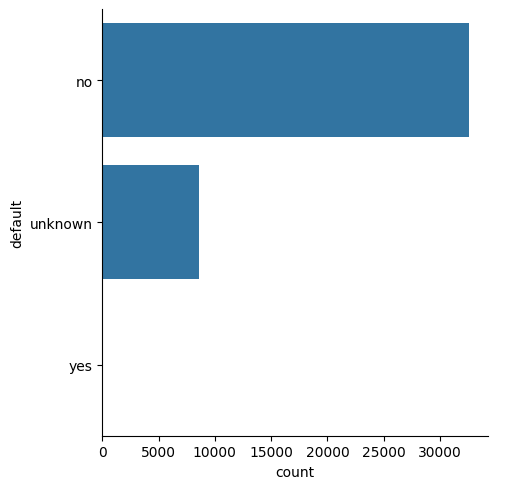

<Figure size 400x500 with 0 Axes>

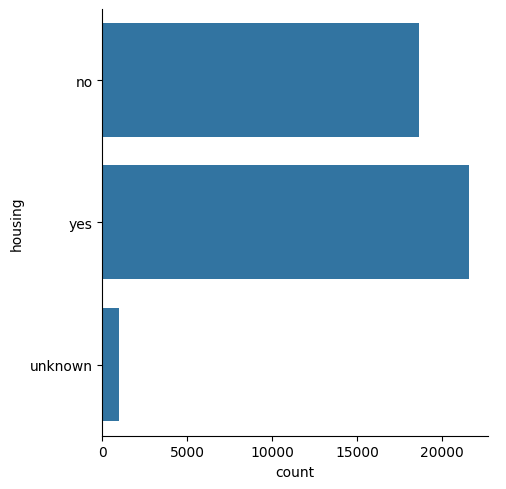

<Figure size 400x500 with 0 Axes>

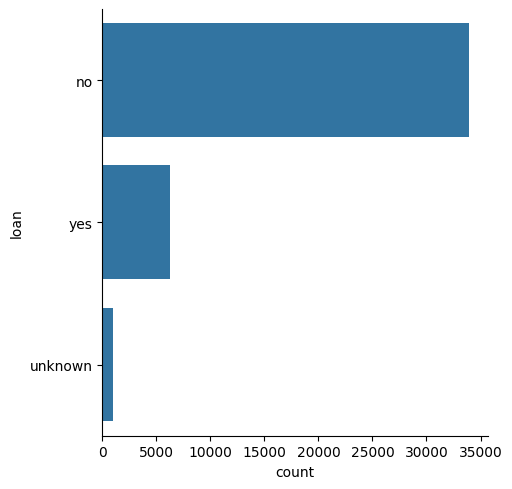

<Figure size 400x500 with 0 Axes>

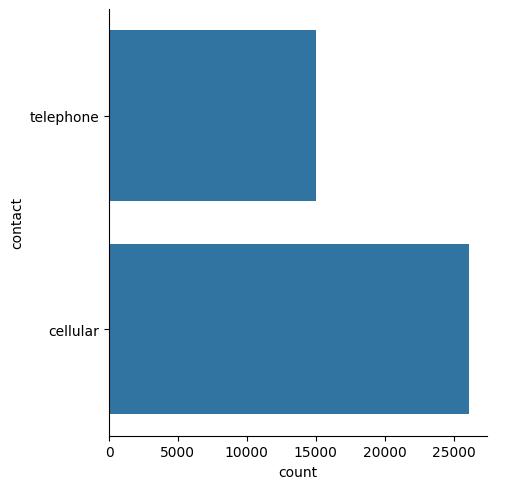

<Figure size 400x500 with 0 Axes>

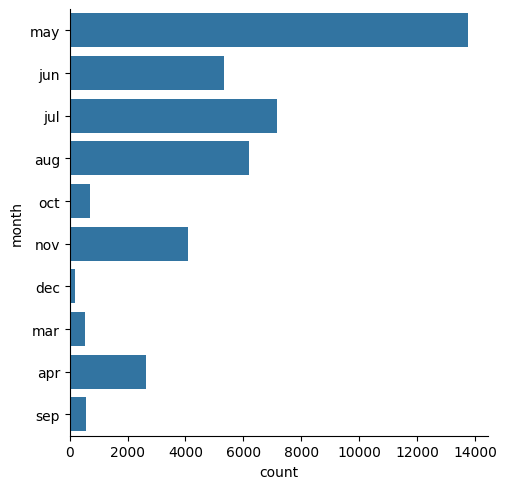

<Figure size 400x500 with 0 Axes>

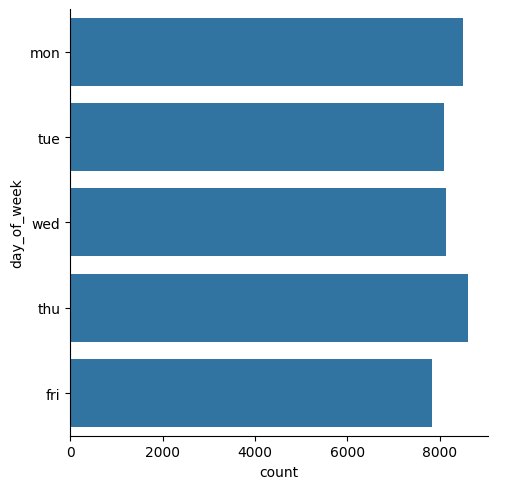

<Figure size 400x500 with 0 Axes>

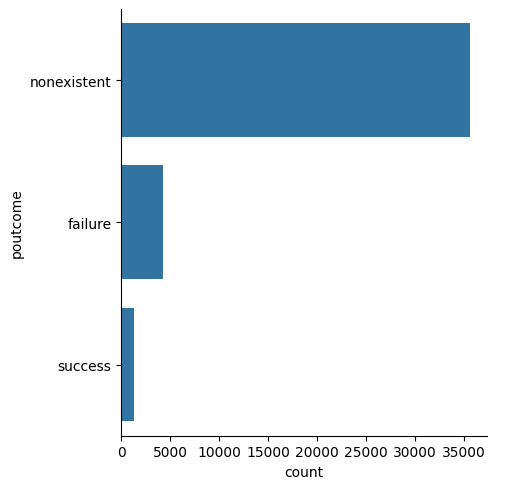

<Figure size 400x500 with 0 Axes>

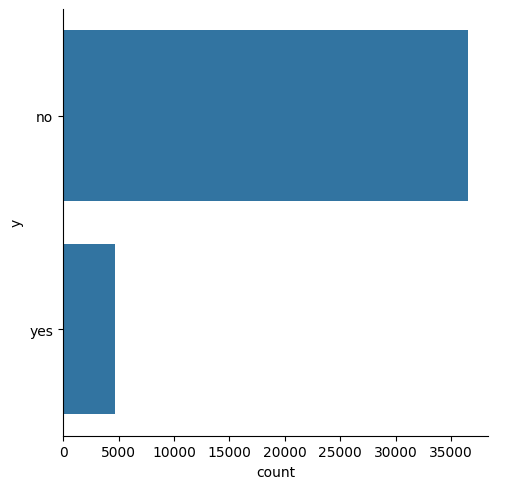

In [13]:
for col in categorical:
    plt.figure(figsize=(4,5))
    sns.catplot(data=categorical,y=categorical[col], kind='count')
    plt.show()

Because we have unknown values in certain columns, let's see if we can clean our data to address the issue. We can start with 'jobs' and 'marital status'.

In [14]:
categorical['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [19]:
categorical['marital'].value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

Because we only have a few rows with unknown values in these columns, let's drop the values.

In [20]:
marriagedrop=base[base['marital']=='unknown'].index
base=base.drop(marriagedrop)

In [17]:
drop=base[base['job'] == 'unknown'].index
base=base.drop(drop)

In [21]:
print('.csv dimensions:',base.shape[0],'rows,',base.shape[1],'columns.')

.csv dimensions: 40787 rows, 21 columns.


For the values with more unknown values, we need to replace with the mean. let's wait until we label encode the data to do this.

Label Encoding: Now that we have an idea of our categorical variables, we can label encode them so we can run multivariate analysis.

In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
numerical_data=base.select_dtypes(include=[np.number])
categorical_data=base.select_dtypes(exclude=[np.number])
for column_name in categorical_data.columns:
  base[column_name + '_encoded']=None
  base[column_name + '_encoded']=label_encoder.fit_transform(base[column_name])

Now let's run some multivariate analyses to compare our target variable with our numerical values.

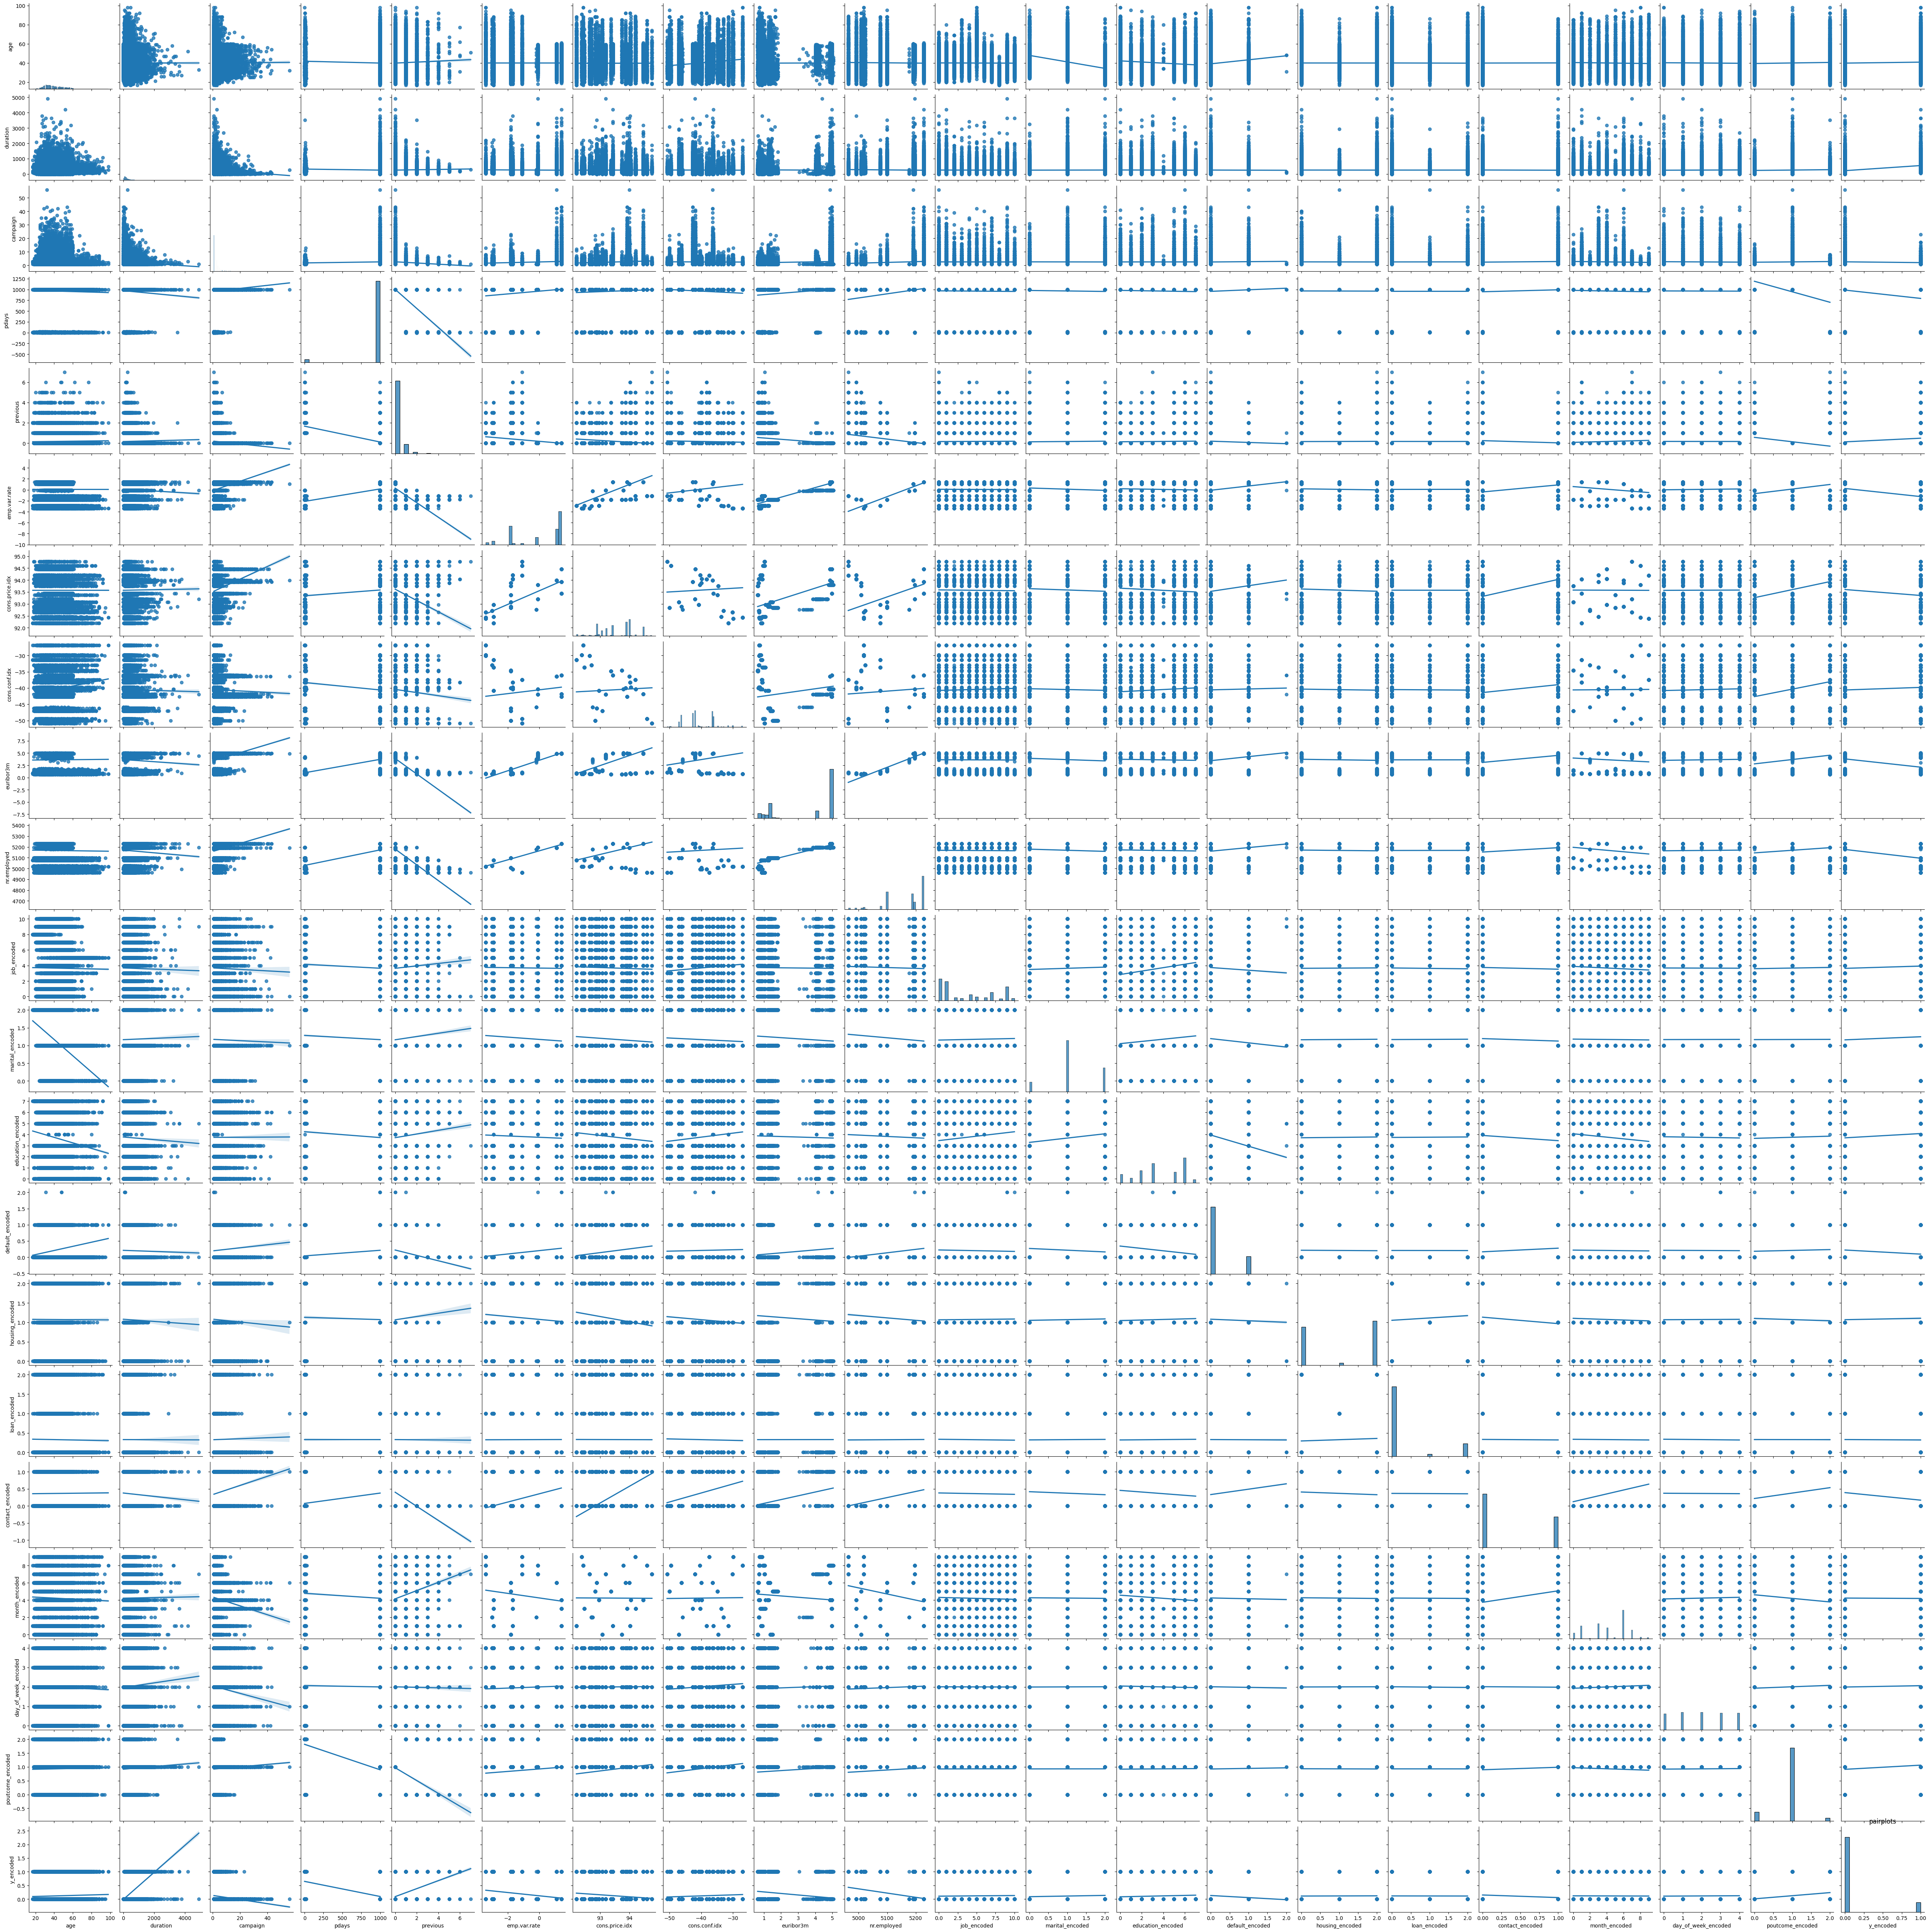

In [37]:
sns.pairplot(base, kind='reg')
plt.title('pairplots')
plt.show()

I notice a few variables that possess a strong positive correlation with our target variable; we 